### Overview Dataset

"Data Komponen Beton".

Data set ini berisikan beberapa kategori sebagai berikut
* cement (kg)
* slag (blast furnace slag, kg)
* ash (fly ash, kg)
* water (kg)
* superplastic (superplasticizer, kg)
* coarseagg (coarse aggregate, kg)
* fineagg (fine aggregate, kg)
* age (days, 1-365)
* strength (Concrete compressive strength, MPa)

# Exploratory Data Analysis (EDA)


# Instruksi Tugas Praktikum FIKTI dan FTI

1. Buat univariate dan bivariate analysis untuk data set di atas
2. Jelaskan kesimpulan yang bisa di ambil dari analysis yg anda lakukan


<a id="1"></a>

# 1. Pengambilan Data:

## 1.1 Import packages

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

## 1.2 Import data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/supasonicx/ATA-praktikum-01/main/concrete.csv")
data.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [3]:
data.shape

(1030, 9)

# 2. EDA

## 2.1.Univariate analysis
<a id="2"></a>

## 2.1.1 Age

### **i.	Distribusi**

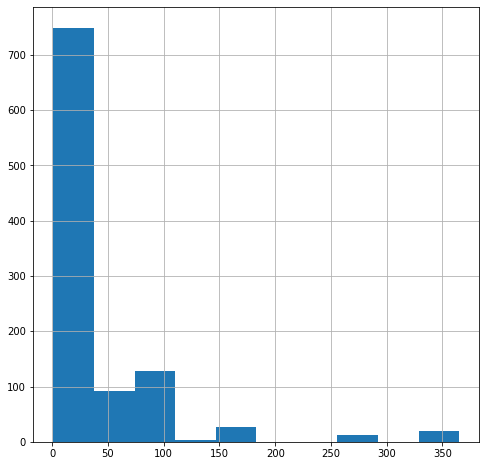

In [4]:
# Buat diagram di sini
data['age'].hist(figsize=(8,8))
plt.show()

### **ii.	Deskripsi**

Jelaskan diagram di atas

<a id="3"></a>
# 2.2.Bivariate analysis

## 2.2.1 Age - Strength (Hubungan)

### i. **Boxplot**

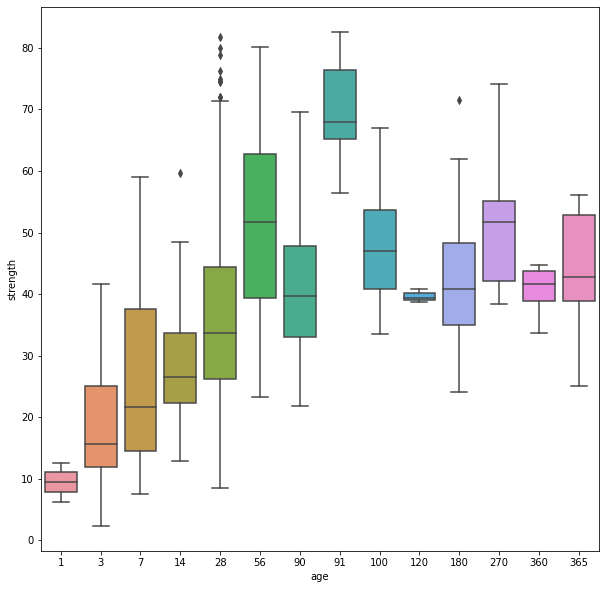

In [5]:
# Buat diagram di sini
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="age", y="strength", data=data)
plt.show()

In [6]:
data[['age', 'strength']].groupby(['age'], as_index=False).mean().sort_values(by='strength', ascending=False)

,age,strength
7,91,69.808636
5,56,51.890220
11,270,51.272308
8,100,47.668846
13,365,43.557857
10,180,41.730385
12,360,40.696667
6,90,40.480370
9,120,39.646667
4,28,36.748612


### ii. Deskripsi

Jelaskan diagram di atas

### iii. Uji Hipotesis
**Two sampled T-test** :-Uji Independent Samples t Test atau 2-sample t-test membandingkan rata-rata dua kelompok independen untuk menentukan apakah ada bukti statistik bahwa rata-rata populasi terkait berbeda secara signifikan.


Tentukan null dan alternate hypothesis.

    Secara umum, null hypothesis akan menyatakan bahwa kedua populasi yang diuji tidak memiliki perbedaan yang signifikan secara statistik.
    alternate hypothesis akan menyatakan bahwa ada perbedaan.

Dalam contoh ini kita dapat mengatakan bahwa:
*  Null Hypothesis :- tidak ada perbedaan Rerata usia kelompok kekuatan >50 MPa dan kelompok kekuatan <=50 MPa.
*  Alternate Hypothesis :- ada perbedaan Rerata usia kelompok kekuatan >50 MPa dan kelompok kekuatan <=50 MPa.

In [7]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random

data = data[(np.abs(stats.zscore(data["age"])) < 3)] 

strength_1 = data[data['strength']<=50]['age']
strength_0 = data[data['strength']>50]['age']

strength_0 = strength_0.values.tolist()
strength_0 = random.sample(strength_0, 100)
strength_1 = strength_1.values.tolist()
strength_1 = random.sample(strength_1, 100)

In [9]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(strength_1,strength_0,equal_var = False)
print("ttest",ttest)
print('p value', pval)



if pval < 0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -5.508234592276078
p value 1.1383134956909377e-07
null hypothesis ditolak


### iv. Kesimpulan akhir

Tulis kesimpulan akhir mengenai dataset :